# ARIMA and SARIMA Implementation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# For time stamps
from datetime import datetime

## Get Data

In [2]:
df = pd.read_csv('./data/all_stocks_5yr.csv')

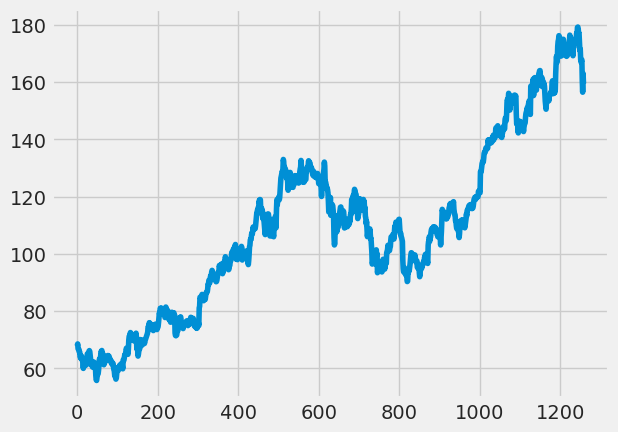

In [3]:
AAPL = df[df['Name']=='AAPL']
data = AAPL[['date','close']].reset_index(drop=True)
plt.plot(data['close'])

## Data Eng

<Figure size 640x480 with 0 Axes>

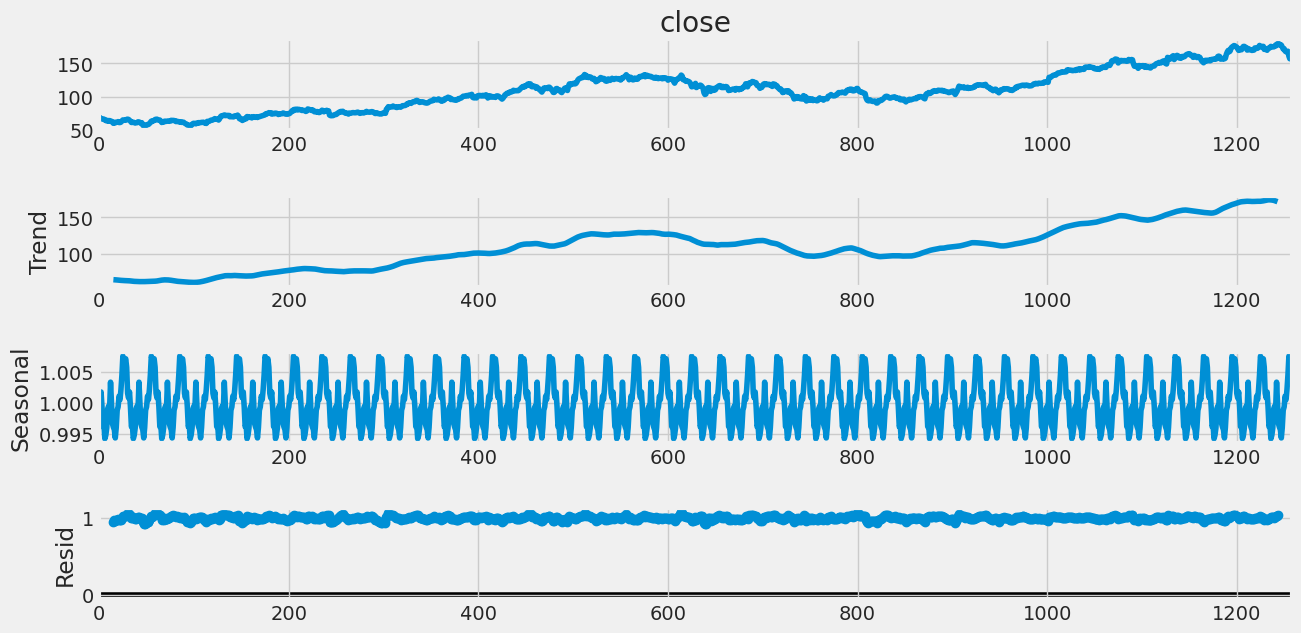

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["close"],model='multiplicative',period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 7)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

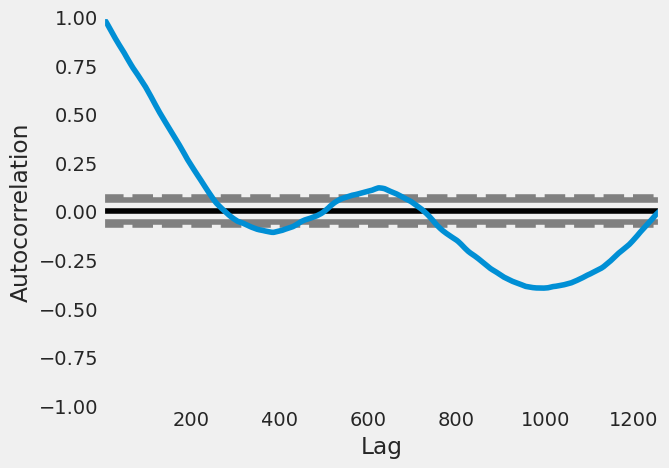

In [5]:
pd.plotting.autocorrelation_plot(data["close"])

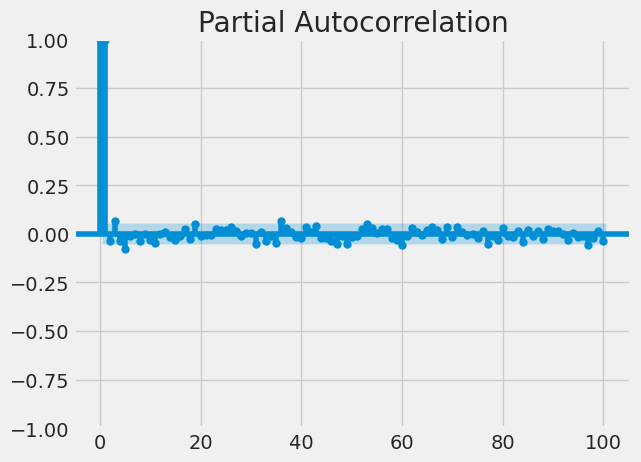

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(data["close"], lags = 100)
plt.show()

## ARIMA

In [17]:
p, d, q = 11, 1, 2
from statsmodels.tsa.arima.model import ARIMA

train_n = int(len(data)*.75)

train,test = data['close'][:train_n],data['close'][train_n:]

model = ARIMA(train, order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  944
Model:                ARIMA(11, 1, 2)   Log Likelihood               -1716.084
Date:                Tue, 03 Jan 2023   AIC                           3460.168
Time:                        14:50:13   BIC                           3528.055
Sample:                             0   HQIC                          3486.043
                                - 944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0413      0.929      0.044      0.965      -1.780       1.863
ar.L2          0.0189      0.795      0.024      0.981      -1.538       1.576
ar.L3         -0.0110      0.040     -0.273      0.7

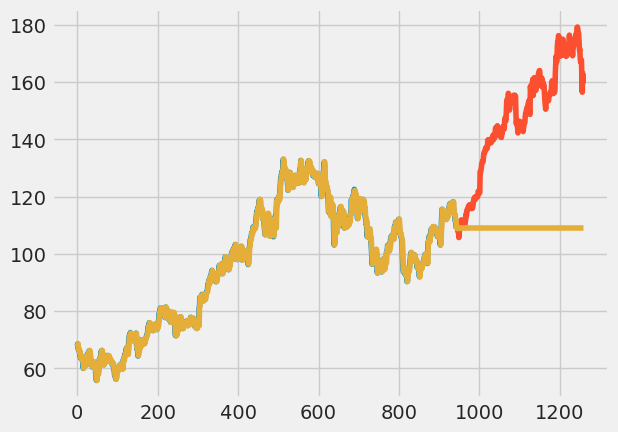

In [18]:
predictions = fitted.predict(1,len(data))

plt.plot(train)
plt.plot(test)
plt.plot(predictions)

## SARIMA

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
# model=SARIMAX(train,order=(p, d, q),seasonal_order=(p, d, q, 12))

model = SARIMAX(train, exog=None, order=(0, 1, 1), seasonal_order=(p, d, q, 12))
# model.fit(method='newton')
model.fit(method='lbfgs')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93068D+00    |proj g|=  2.11777D-01


 This problem is unconstrained.



At iterate    5    f=  1.85392D+00    |proj g|=  2.39856D-03

At iterate   10    f=  1.85221D+00    |proj g|=  4.72922D-02


KeyboardInterrupt: 

In [96]:
predictions = model.predict(len(test))
print(predictions)

1259    159.098600
1260    159.280897
1261    159.736006
1262    159.807312
1263    160.003494
           ...    
1555    181.898459
1556    181.963703
1557    182.105078
1558    181.961100
1559    182.100887
Name: predicted_mean, Length: 301, dtype: float64


<AxesSubplot:>

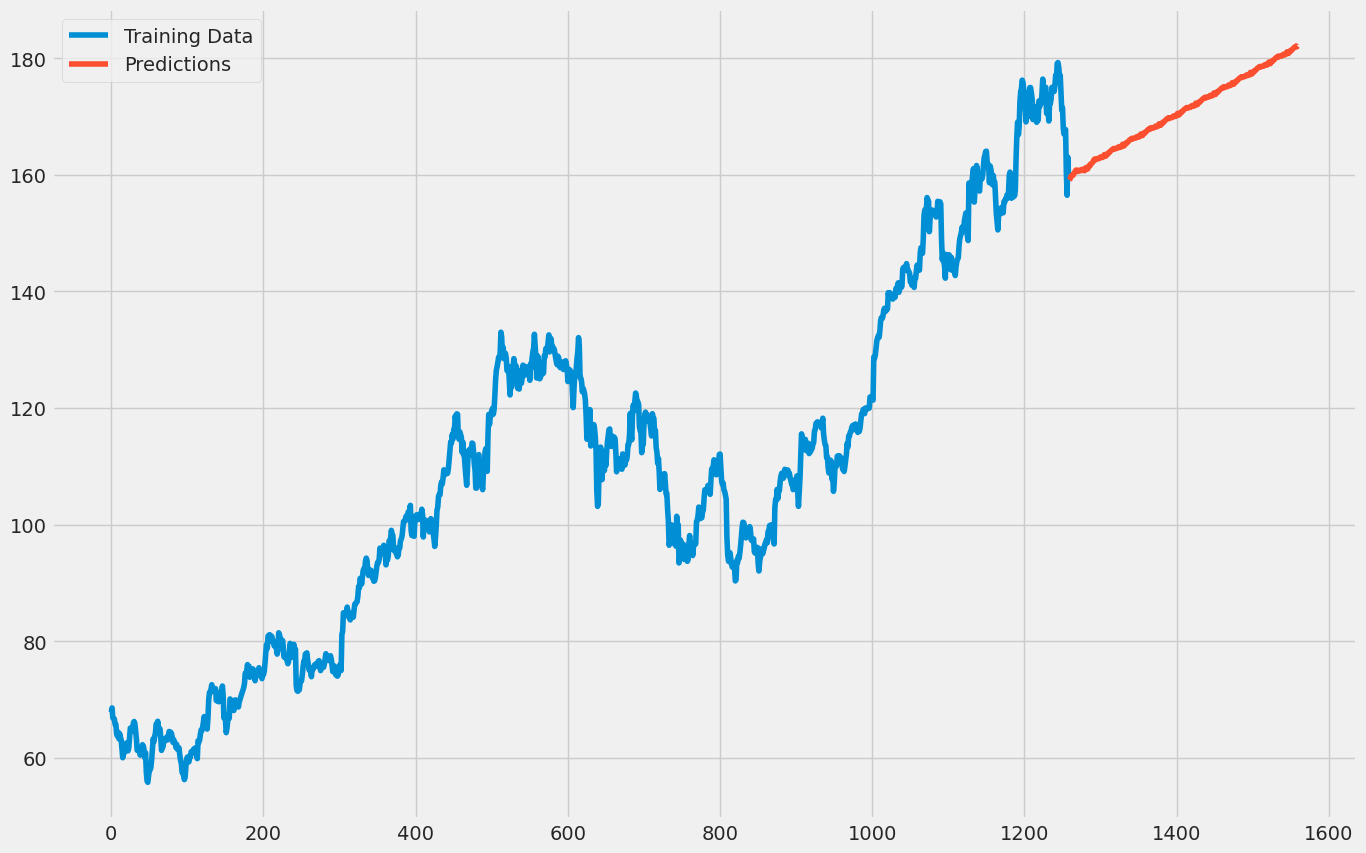

In [97]:
data["close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")
